# Classification of MNIST

MNIST is a dataset consisting of handwritten numbers 0-9 widely used as a benchmark in machine learning. While the dataset is very simple, it is still in seminal papers to demonstrate proof of concept (i.e. [Dynamic Routing](https://arxiv.org/pdf/1710.09829.pdf)). Below we load some sample digits for you.

Benchmark datasets are very useful, to note a couple other widely used benchmarks: [SVHN](http://ufldl.stanford.edu/housenumbers/) (Street View House Numbers), [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) (Like MNIST, but more fashion), [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) (10 and 100 different objects), and [ImageNet](http://www.image-net.org/) (very large real world image dataset).

We load up a downsampled MNIST dataset below. MNIST is usually 28x28, we will work with 8x8 images.

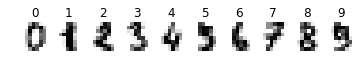

In [104]:
# Import datasets

%matplotlib inline

from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()

# Part I

You will classifiy two numbers of your choice. Start by extracting two features from the image. We suggest looking at intensity and symmetry using `sklearn.model_selection.train_test_split`, a convenient function which will save 10% of the data for testing. We split the dataset into training and test sets. Save your test set so we can evaluate how well you classify.

`X_test` and `y_test` should be used to evaluate the performance of the classifier you build. Moving forward just work with `X_train` and `y_train`.

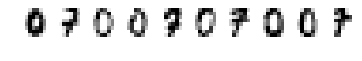

In [105]:
from sklearn.model_selection import train_test_split
import numpy as np

number_a = 0 # TODO choose your digit
number_b = 7 # TODO choose your digit

digit_a_indexes = np.where(digits.target==number_a) 
digit_b_indexes = np.where(digits.target==number_b)
targets = np.concatenate((digits.target[digit_a_indexes], digits.target[digit_b_indexes]))
images = np.concatenate((digits.images[digit_a_indexes], digits.images[digit_b_indexes]))
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()

# Feature Extraction

You will create 2 feature extractors based on the numbers you choose. These will be two functions which take in an image and output a single float. For example, image intensity and symmetry can be used as a features.

In [146]:

def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):
        '''compute_feature_a will compute intensity'''
        intensity = np.mean(image)
        return intensity

    
    def compute_feature_b(image):
        '''compute_feature_b will compute symmetry'''
        ax1=image[4,:]
        ax2=image[:,4]
        cor=np.correlate(ax1,ax2)/1000

        return cor
    
    return compute_feature_a(image), compute_feature_b(image)

Once you compute these two features, you can apply them to your images. Don't worry about the details of the first function below, all it does is map the `compute_features` function you wrote to each image in your `X_train` variable.

Afterwards let us plot the features you've crafted to see if they can separate into two classes.

In [147]:
# X_features[0]

(0.024, 1.2)

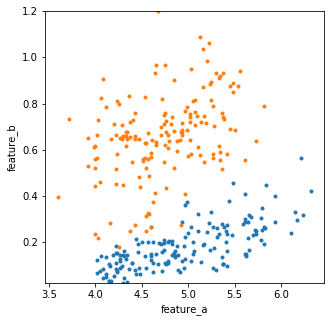

In [148]:
# Apply and plot your features


X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 

# Linear Classification with Pseudo Inverse

`X_features` is a 2 dimensional array of features and `y_train` is our ground truth label. Find the best plane that separates these two classes using the pseudo inverse and plot it. For this problem, we need to set `y=-1` for `number_a` and `y=1` for `number_b`.

The loss $L$ we would like to minimize for each $i$ row in our matrix is.

$$L  = \frac{1}{2}\Sigma (y^{(i)} - W^{T}x^{(i)})^{2}$$

where

$$x^{(i)} = 
\begin{bmatrix}
    feature_a \\
    feature_b \\
\end{bmatrix}$$

$$W = 
\begin{bmatrix}
    w_1 \\
    w_2 \\
\end{bmatrix}$$


In matrix form we convert $x^{(i)}$ into $X$ which is the number of examples we have, in our case is MNIST digit features extracted.

$$X = 
\begin{bmatrix}
    feature_{a1} & feature_{b1} \\
    feature_{a2} & feature_{b2} \\
    ... & ... \\
    feature_{ai} & feature_{bi} \\
\end{bmatrix}$$


$$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$


### Explain

Let's solve L analytically, set $\frac{d}{dW}L = 0$ and solve. Show your steps.

Step 1: $$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Step 2: $$ \frac{d}{dW}L  = \frac{d}{dW} \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Step 3: $$...$$

### Compute
Going back to linear algebra, we can re-write the classification problem as $Xw = y^*$, as we did during class. Here, $X$ is our features matrix `X_features` that has the features of each data example along each row, $y^*$ is our `pseudo_y` vector, and $w$ is the unknown weights vector that we'd like to figure out.

The pseudo inverse is $$(X^{T}X)^{-1}X^{T} = X^{+}$$

Solving for $w$, $$w = X^{+}y^*$$

To perform this computation: 

#### (a) create a features vector $X$ and compute its pseudo inverse. (This is the var `X_features`)

#### (b) create a vector like $y^*$ to hold the labels. (Done below for you as `pseudo_y`)

#### (c) find $w$

In [149]:
# pseudo_y = np.copy(y_train)

train_label = np.copy(y_train)
train_label[y_train == number_a] = -1
train_label[y_train == number_b] = 1

test_label = np.copy(y_test)
test_label[y_test == number_a] = -1
test_label[y_test == number_b] = 1

In [150]:
# X_train.shape

In [151]:
w = np.linalg.pinv(X_features)@train_label
w

array([-0.27640424,  3.15553187])

In [152]:
# w = np.linalg.pinv(X_features) @ train_y
# y_predicted = X_features @ w

### (d) To examine the result of the least squares solution under this formulation, compute the train and test error using an appropriate threshold. Does your trained model generalize well to the test data? 

Create a function called `accuracy_metrics` which does this.

In [153]:
def accuracy_metrics(features, label):
    
    return np.mean((features>0)==(label>0))

    # Return the % accuracy
    

In [154]:
X_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))


In [155]:
print("training accuracy:", accuracy_metrics(X_features@w, train_label))
print("test accuracy:", accuracy_metrics(X_features_test@w, test_label))

training accuracy: 0.9532710280373832
test accuracy: 0.9166666666666666


### (e) Write a function that visualizes the decision boundary corresponding to your chosen threshold (you can either draw a line or shade the region above/below the threshold). 

The function `visualize_model` should take in features, labels, and your calculated weights. It should show a matplotlib figure.

In [156]:
def visualize_model(features, labels, weights):
    xx = np.linspace(features[:,0].min(),features[:,0].max())
    a = -weights[0]/weights[1]
    yy = a*xx
    plt.plot(xx,yy,'k-')
    return  plt.show()
    

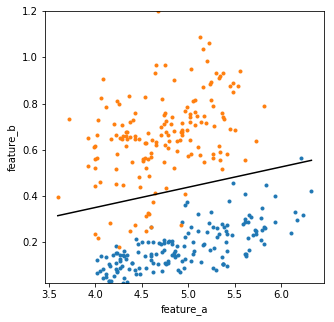

In [157]:
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]
plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 
visualize_model(X_features, train_label, w)

### (f) Repeat the above steps after adding in a bias term, allowing for the classification line to not pass through the origin. You can do this by augmenting the X feature matrix with an additional feature column of ones, and making the unknown weight vector one entry longer -- does performance improve?

If you created your functions correctly, you shouldn't need to change them and you only need to modify `X_features`. 

In [14]:
# Find w and bias
# Get the test and train accuracy of your model with bias
# Visualize the model, you may need to change your code.

In [158]:
new_X_features = np.ones((X_features.shape[0],X_features.shape[1]+1))
new_X_features[:,0]= X_features[:,0]
new_X_features[:,1]= X_features[:,1]
#new_X_features

new_w = np.linalg.pinv(new_X_features)@train_label
new_w

array([-0.48313034,  3.11865222,  1.02840205])

In [159]:
new_X_features_test = np.ones((X_features_test.shape[0],X_features_test.shape[1]+1))
new_X_features_test[:,0]= X_features_test[:,0]
new_X_features_test[:,1]= X_features_test[:,1]

In [160]:
print("training accuracy:", accuracy_metrics(new_X_features@new_w, train_label))
print("test accuracy:", accuracy_metrics(new_X_features_test@new_w, test_label))

training accuracy: 0.956386292834891
test accuracy: 0.9166666666666666


It improves a little bit about training accuracy

In [161]:
def visualize_bias_model(features, labels, weights):
    xx = np.linspace(features[:,0].min(),features[:,0].max())
    a = -((weights[2]/weights[1])/(weights[2]/weights[0]))
    yy = a*xx-(weights[2]/weights[1])
    plt.plot(xx,yy,'k-')
    return  plt.show()

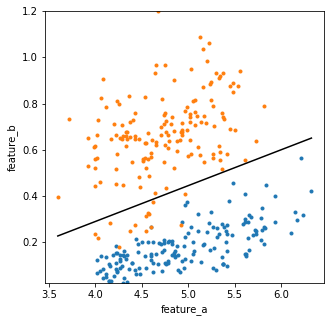

In [162]:
new_X_features_a = new_X_features[np.where(y_train==number_a)]
new_X_features_b = new_X_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(new_X_features_a[:, 0], new_X_features_a[:, 1], '.')
plt.plot(new_X_features_b[:, 0], new_X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(new_X_features[:, 1].min(), new_X_features[:, 1].max()) 

visualize_bias_model(new_X_features[:,0:1], train_label, new_w)

# Linear Classification with Finite Differences

Rather than use pseudo inverse (analytically solving your optimization equation). Instead, initialize your parameter x to some random numbers. Move x some small epsilon amount in the each direction to compute the total change in your loss and calculate the gradient. Then update x by taking a small step in that gradient direction. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

1. Solve for x
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps

### Define a loss.

In [163]:
# def loss(features, labels, weights):
#     return np.matmul((labels-np.matmul(features,weights)).transpose(), label-np.matmul(features,weights))/labels.shape[0]


In [164]:
def loss(features, labels, weights):
    return np.matmul((labels-np.matmul(features,weights)).transpose(),labels-np.matmul(features,weights))/labels.shape[0]



### Now iteratively solve for your weights w

In [165]:
def get_gradient(features,labels,weights,delta,loss):
    F_delta = [0,0]
    F = loss(features,labels,weights)
    
    # calculation in x direction
    delta_weights = np.copy(weights)
    delta_weights[0] = delta_weights[0]+delta
    F_delta[0] = loss(features,labels,delta_weights)
    
    # calculation in y direction
    delta_weights = np.copy(weights)
    delta_weights[1] = delta_weights[1]+delta
    F_delta[1] = loss(features,labels,delta_weights) 
    
    gradient = (F_delta-F)/delta
    
    return gradient/(np.linalg.norm(gradient))


[0.04816469 0.93582592]
Loss = 1.0220829843736907
training accuracy: 0.5015576323987538
test accuracy: 0.5
[-0.05173114  0.93747056]
Loss = 0.629311072225549
training accuracy: 0.9439252336448598
test accuracy: 0.8333333333333334
[-0.09094481  1.01597071]
Loss = 0.5765300655433968
training accuracy: 0.9501557632398754
test accuracy: 0.9166666666666666
[-0.09958072  1.11559681]
Loss = 0.5437781175079462
training accuracy: 0.9501557632398754
test accuracy: 0.9166666666666666
[-0.10821641  1.21522295]
Loss = 0.5125875681249192
training accuracy: 0.9501557632398754
test accuracy: 0.9166666666666666
[-0.11685208  1.31484911]
Loss = 0.48295842529992056
training accuracy: 0.9501557632398754
test accuracy: 0.9166666666666666
[-0.12548788  1.41447525]
Loss = 0.4548906928056657
training accuracy: 0.9501557632398754
test accuracy: 0.9166666666666666
[-0.13412357  1.51410138]
Loss = 0.4283843743064334
training accuracy: 0.9501557632398754
test accuracy: 0.9166666666666666
[-0.14275896  1.61372751]

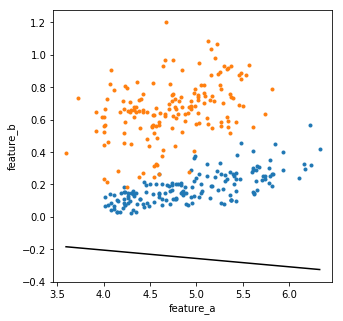

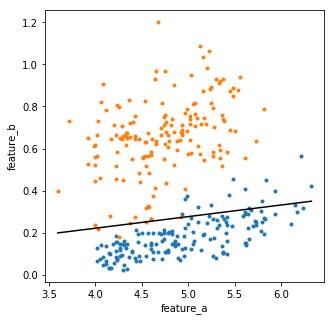

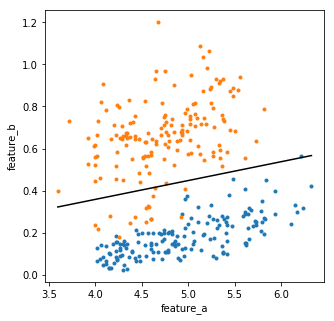

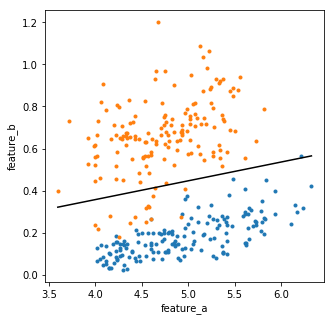

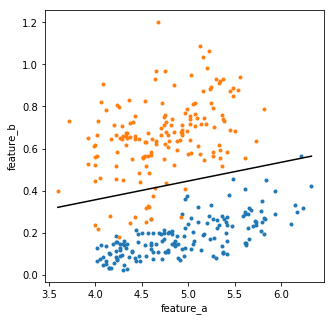

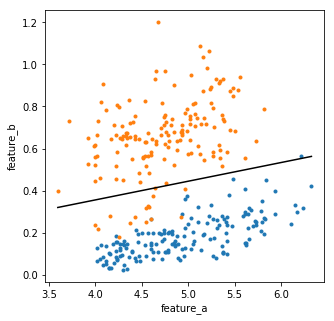

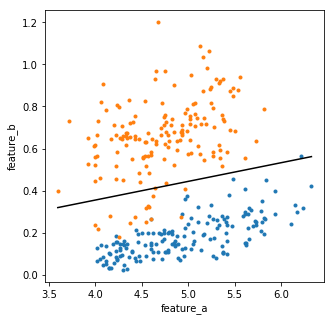

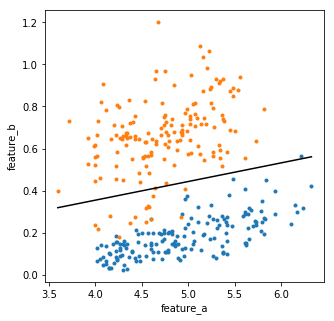

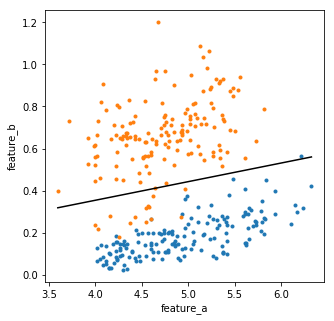

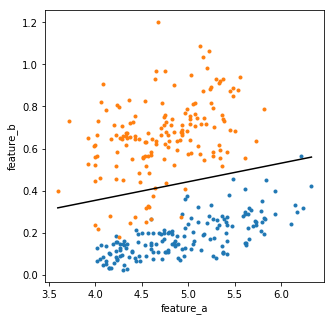

In [166]:
w1 = np.random.rand(2)# init weights to some random value.
num_iterations = 1000000 # set this to the number of iterations
delta = 1e-13 # This may need to be adjusted
step_size = 1e-6

for i in range(num_iterations):
    
    gradient = get_gradient(X_features,train_label,w1,delta,loss)
    w1 += step_size*-gradient
    L = loss(X_features,train_label,w1)
    
    if (np.linalg.norm(gradient) == 0):
        break
        
    if(i%100000==0):
        
        
        plt.figure(figsize=(5,5))
        plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
        plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
        plt.xlabel('feature_a')
        plt.ylabel('feature_b')
        line_x = np.linspace(X_features[:,0].min(),X_features[:,0].max())
        line_y = (-w1[0]/w1[1])*line_x
        plt.plot(line_x,line_y,'k-')
        print(w1)
        print('Loss =', L)
        print("training accuracy:", accuracy_metrics(X_features@w1, train_label))
        print("test accuracy:", accuracy_metrics(X_features_test@w1, test_label))
         



# Logistic Classification with Finite Differences

Now, let's consider the same problem with a different loss function.

$$L = \frac{1}{N}\sum_{i=1}^n ln(1 + e^{-y^{(i)}W^{T}x^{(i)}})$$

Use finite differences to compute the gradient and iteratively calculate $W$

1. Solve for x
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps


In [180]:
logistic_y = np.copy(y_train)
logistic_y[y_train == number_a] = -1
logistic_y[y_train == number_b] = 1

logistic_y_test = np.copy(y_test)
logistic_y_test[y_test == number_a] = -1
logistic_y_test[y_test == number_b] = 1

In [181]:
def logistic_loss(features, labels, weights):
    N = len(labels)
    loss = 0 
    for i in range(N):
        loss += np.log(1+np.e**(-labels[i]*weights@features[i]))
    loss = loss/N
    return loss  

In [177]:
# def losgitic_loss(features, labels, weights):
#     return np.matmul((labels-np.matmul(features,weights)).transpose(),labels-np.matmul(features,weights))/labels.shape[0]

In [182]:
def logistic_get_gradient(features,labels,weights,delta):
    F_delta = [0,0]
    F = logistic_loss(features,labels,weights)
    
    # calculation in x direction
    delta_weights = np.copy(weights)
    delta_weights[0] = delta_weights[0]+delta
    F_delta[0] = logistic_loss(features,labels,delta_weights)
    
    # calculation in y direction
    delta_weights = np.copy(weights)
    delta_weights[1] = delta_weights[1]+delta
    F_delta[1] = logistic_loss(features,labels,delta_weights) 
    
    gradient = (F_delta-F)/delta
    gradient = gradient/(np.linalg.norm(gradient))
    
    return gradient


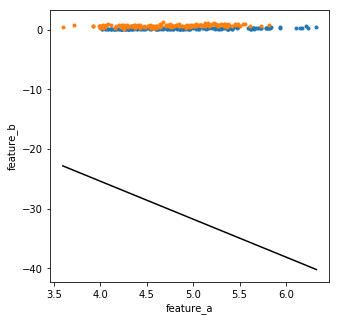

Loss = 0.7291361647897496
training accuracy: 0.5015576323987538
test accuracy: 0.5
[0.10513458 0.01653654]


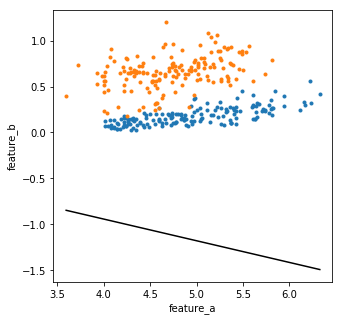

Loss = 0.6889249744554757
training accuracy: 0.5015576323987538
test accuracy: 0.5
[0.01044545 0.04418333]


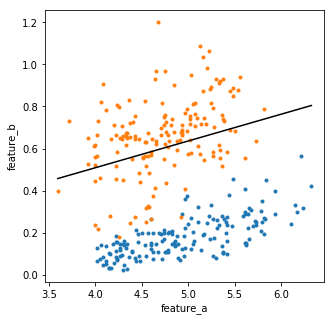

Loss = 0.6760860709055451
training accuracy: 0.8348909657320872
test accuracy: 0.8055555555555556
[-0.01751381  0.13770612]


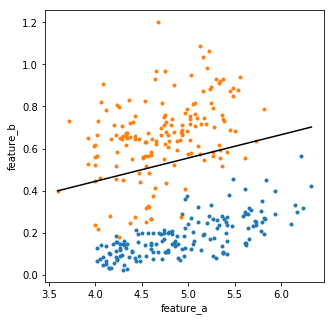

Loss = 0.6640892314243017
training accuracy: 0.9003115264797508
test accuracy: 0.8611111111111112
[-0.02633142  0.23731635]


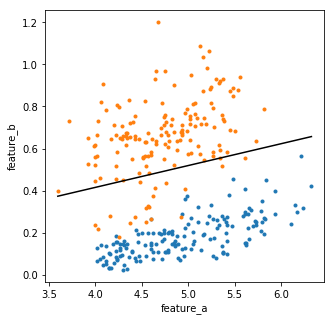

Loss = 0.6522872530575873
training accuracy: 0.940809968847352
test accuracy: 0.8888888888888888
[-0.0349712   0.33694241]


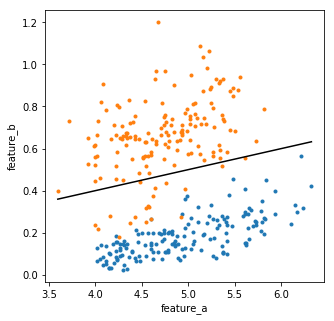

Loss = 0.6406797243783834
training accuracy: 0.940809968847352
test accuracy: 0.8888888888888888
[-0.04360957  0.4365686 ]


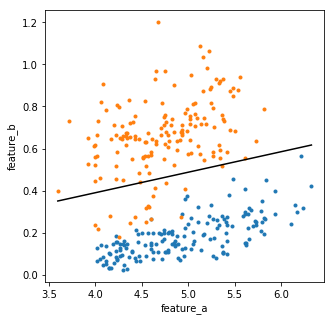

Loss = 0.6292661497278306
training accuracy: 0.9470404984423676
test accuracy: 0.8888888888888888
[-0.05224618  0.53619494]


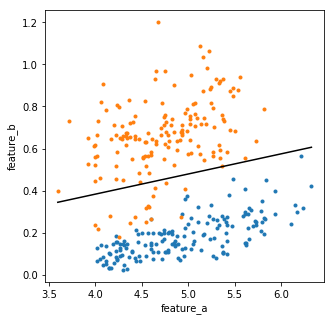

Loss = 0.618045901597353
training accuracy: 0.9501557632398754
test accuracy: 0.8888888888888888
[-0.06087997  0.63582152]


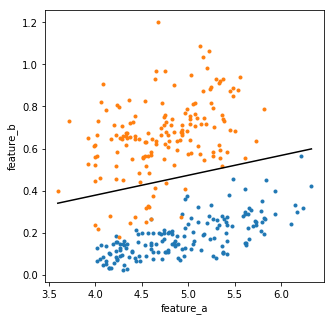

Loss = 0.6070182236697811
training accuracy: 0.9501557632398754
test accuracy: 0.8888888888888888
[-0.06951071  0.73544837]


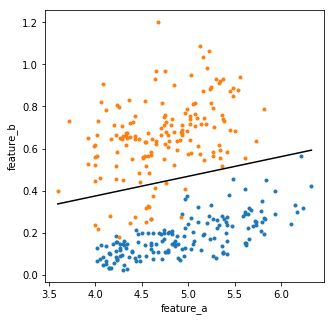

Loss = 0.5961822340283236
training accuracy: 0.9501557632398754
test accuracy: 0.8888888888888888
[-0.07813736  0.83507557]


In [183]:
w2 = np.random.rand(2) # init weights to some random value.
num_iterations = 10000 # set this to the number of iterations
delta = 1e-11 # This may need to be adjusted
step_size = 1e-4
    
for i in range(num_iterations):
    # move w0,w1 some delta and calculate derivative in w0,w1 direction
    gradient = logistic_get_gradient(X_features,logistic_y,w2,delta)
    # update w0 and w1 some step_size in the direction of steepest descent
    w2 += step_size*(-gradient)
    
    if (np.linalg.norm(gradient) == 0):
        break
        
        
    if(i%1000==0):
        plt.figure(figsize=(5,5))
        plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
        plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
        plt.xlabel('feature_a')
        plt.ylabel('feature_b')
        visualize_model(X_features, logistic_y, w2) 
        
        L = logistic_loss(X_features,logistic_y,w2)
        print('Loss =', L)
        print("training accuracy:", accuracy_metrics(X_features@w2, logistic_y))
        print("test accuracy:", accuracy_metrics(X_features_test@w2, logistic_y_test))
        print(w2)

# Part II

Now let’s repeat the exercise above, but using a different set of features. Here, let’s assume that we have a camera that has just two pixels in it, which is taking pictures of the MNIST image dataset. One of these two pixels will detect the total intensity from the top half of each digit to form feature x_1, and the other pixel will detect the total intensity from the bottom half of each digit to form feature x_2. Please use these two top/bottom total intensities to form a new feature vector for each MNIST image that you’re using for classification, and repeat the exercise above to obtain a plot of classification performance and an average classification accuracy score. 

**Note that this classification score (in some sense) reflects what would be possible with a "normal" camera.**

 - Plot Points after feature generation
 - Linear Classification (Pseudo or Gradient method)
   - test/train accuracy
 - Logistic Classification
   - test/train accuracy

In [193]:
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):
        '''compute_feature_a will compute ...'''
         
        return np.sum(image[0:3])

    def compute_feature_b(image):
        '''compute_feature_b will compute ...'''

        return np.sum(image[4:7])
    
    return compute_feature_a(image), compute_feature_b(image)

(54.0, 181.0)

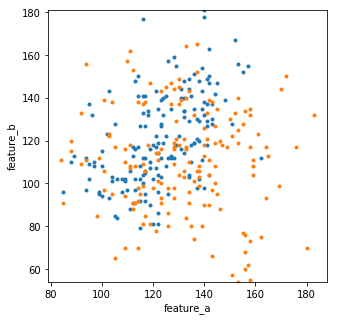

In [194]:
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 

In [195]:
w = np.linalg.pinv(X_features)@train_label

In [196]:
def accuracy_metrics(features, label):
    
    return np.mean((features>0)==(label>0))


In [197]:
X_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))


In [198]:
print("training accuracy:", accuracy_metrics(X_features@w, train_label))
print("test accuracy:", accuracy_metrics(X_features_test@w, test_label))

training accuracy: 0.6448598130841121
test accuracy: 0.75


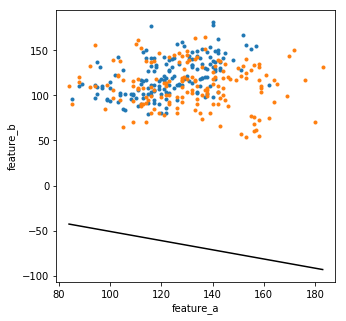

Loss = 60.741456626238005
training accuracy: 0.5015576323987538
test accuracy: 0.5
[0.33788663 0.66285813]


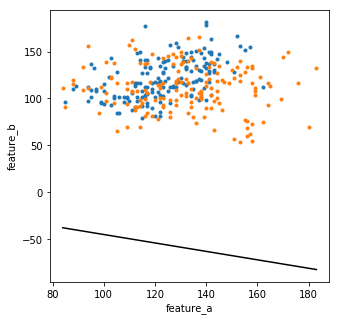

Loss = 52.132475752562584
training accuracy: 0.5015576323987538
test accuracy: 0.5
[0.26654912 0.59277989]


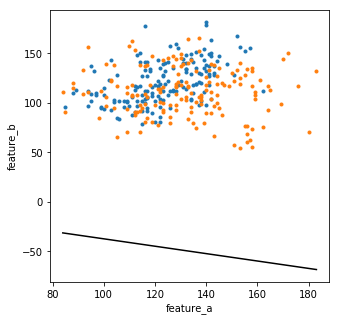

Loss = 43.52349487888716
training accuracy: 0.5015576323987538
test accuracy: 0.5
[0.1952116  0.52270166]


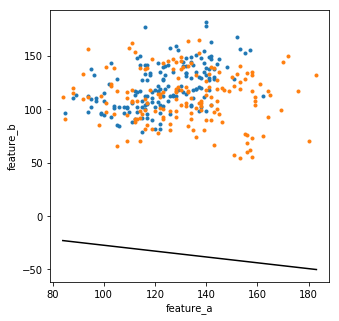

Loss = 34.9145140052117
training accuracy: 0.5015576323987538
test accuracy: 0.5
[0.12387409 0.45262342]


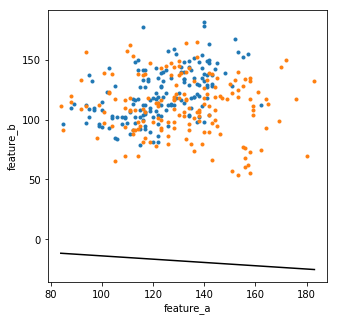

Loss = 26.305533131536134
training accuracy: 0.5015576323987538
test accuracy: 0.5
[0.05253657 0.38254519]


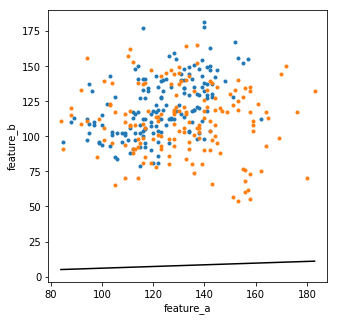

Loss = 17.696552264370805
training accuracy: 0.5015576323987538
test accuracy: 0.5
[-0.01880094  0.31246695]


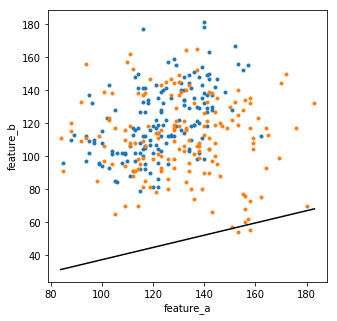

Loss = 9.101211787153751
training accuracy: 0.4953271028037383
test accuracy: 0.4444444444444444
[-0.09008822  0.24233779]


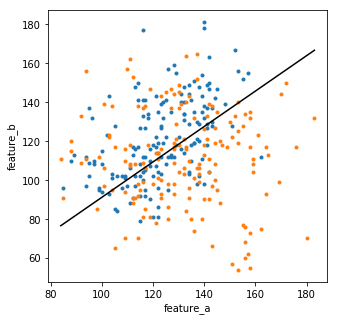

Loss = 2.614742617961484
training accuracy: 0.3613707165109034
test accuracy: 0.25
[-0.15067957  0.16540078]


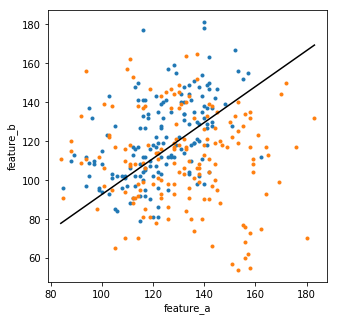

Loss = 1.6093445481923636
training accuracy: 0.3582554517133956
test accuracy: 0.25
[-0.08418428  0.09095858]


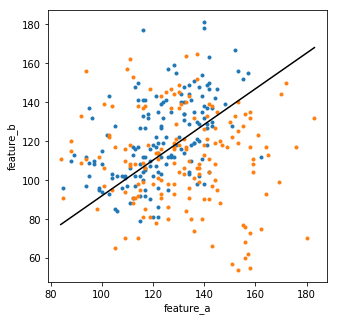

Loss = 0.8000487007892798
training accuracy: 0.35514018691588783
test accuracy: 0.25
[-0.01619214  0.01763013]


In [201]:
w3 = np.random.rand(2) # init weights to some random value.
num_iterations = 10000 # set this to the number of iterations
delta = 1e-8 # This may need to be adjusted
step_size = 1e-4
    
for i in range(num_iterations):
    # move w0,w1 some delta and calculate derivative in w0,w1 direction
    gradient = logistic_get_gradient(X_features,logistic_y,w3,delta)
    # update w0 and w1 some step_size in the direction of steepest descent
    w3 += step_size*(-gradient)
    
    if (np.linalg.norm(gradient) == 0):
        break
        
        
    if(i%1000==0):
        plt.figure(figsize=(5,5))
        plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
        plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
        plt.xlabel('feature_a')
        plt.ylabel('feature_b')
        visualize_model(X_features, logistic_y, w3) 
        
        L = logistic_loss(X_features,logistic_y,w3)
        print('Loss =', L)
        print("training accuracy:", accuracy_metrics(X_features@w3, logistic_y))
        print("test accuracy:", accuracy_metrics(X_features_test@w3, logistic_y_test))
        print(w3)

# Part III

Finally, let’s assume that this camera has a special filter in its lens that blurs the MNIST image in a special way before it is detected. Let’s model this 2D blur as a convolution with the 3x3 filter below.

$$X = 
\begin{bmatrix}
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
\end{bmatrix}$$

Convolve the set of MNIST images with this kernel before proceeding to compute the two features of interest as in Part I: the total image intensity, and the image symmetry. Repeat the exercise above to obtain a plot of classification performance and an average classification accuracy score.

**Note that this classification score (in some sense) reflects what would be possible with a “computational” camera, which has a special aperture shape for enhanced image classification.**

 - Plot Points after feature generation
 - Linear Classification (Pseudo or Gradient method)
   - test/train accuracy
 - Logistic Classification
   - test/train accuracy

In [270]:
kernel = [[-1,0,1],
          [-1,0,1],
          [-1,0,1]]

In [271]:
from scipy.signal import convolve2d

In [272]:

def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    image = convolve2d(image,kernel) 
    def compute_feature_a(image):
        '''compute_feature_a will compute intensity'''
        a = abs(image)
        intensity = np.mean(a)/10
        return intensity

    
    def compute_feature_b(image):
        '''compute_feature_b will compute symmetry'''

        ax1=image[4,:]
        ax2=image[:,4]
        cor=np.correlate(ax1,ax2)

        return cor/1000
    
    return compute_feature_a(image), compute_feature_b(image)


(-1.774, 3.786)

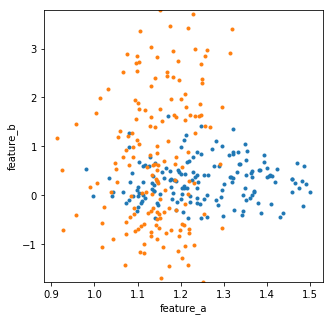

In [300]:
X_features3 = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features3_a = X_features3[np.where(y_train==number_a)]
X_features3_b = X_features3[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features3_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features3_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features3[:, 1].min(), X_features3[:, 1].max()) 

In [301]:
train_label = np.copy(y_train)
train_label[y_train == number_a] = -1
train_label[y_train == number_b] = 1

test_label = np.copy(y_test)
test_label[y_test == number_a] = -1
test_label[y_test == number_b] = 1

In [303]:
w = np.linalg.pinv(X_features3)@train_label
w

array([-0.13715597,  0.24044624])

In [304]:
def accuracy_metrics(features, label):
    
    return np.mean((features>0)==(label>0))


In [306]:
X_features3_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))


In [307]:
print("training accuracy:", accuracy_metrics(X_features3@w, train_label))
print("test accuracy:", accuracy_metrics(X_features3_test@w, test_label))

training accuracy: 0.6666666666666666
test accuracy: 0.6944444444444444


In [283]:
def visualize_model(features, labels, weights):
    xx = np.linspace(features[:,0].min(),features[:,0].max())
    a = -weights[0]/weights[1]
    yy = a*xx
    plt.plot(xx,yy,'k-')
    return  plt.show()

In [284]:
logistic_y = np.copy(y_train)
logistic_y[y_train == number_a] = -1
logistic_y[y_train == number_b] = 1

logistic_y_test = np.copy(y_test)
logistic_y_test[y_test == number_a] = -1
logistic_y_test[y_test == number_b] = 1

In [310]:
w4 = np.random.rand(2) # init weights to some random value.
num_iterations = 10000 # set this to the number of iterations
delta = 1e-4 # This may need to be adjusted
step_size = 1e-4
    
for i in range(num_iterations):
    # move w0,w1 some delta and calculate derivative in w0,w1 direction
    gradient = logistic_get_gradient(X_features,logistic_y,w4,delta)
    # update w0 and w1 some step_size in the direction of steepest descent
    w4 += step_size*(-gradient)
    
    if (np.linalg.norm(gradient) == 0):
        break
        
        
    if(i%1000==0):
#         plt.figure(figsize=(5,5))
#         plt.plot(X_features3_a[:, 0], X_features3_a[:, 1], '.')
#         plt.plot(X_features3_b[:, 0], X_features3_b[:, 1], '.')
#         plt.xlabel('feature_a')
#         plt.ylabel('feature_b')
#         visualize_model(X_features3, logistic_y, w4) 

        
        L = logistic_loss(X_features3,logistic_y,w4)
        print('Loss =', L)
        print("training accuracy:", accuracy_metrics(X_features3@w4, logistic_y))
        print("test accuracy:", accuracy_metrics(X_features3_test@w4, logistic_y_test))
        print("w =",w4)
        print(" ")

Loss = 378.2540499501754
training accuracy: 0.4236760124610592
test accuracy: 0.4166666666666667
w = [0.0889171  0.99850688]
 
Loss = 285.4188977296431
training accuracy: 0.38317757009345793
test accuracy: 0.3611111111111111
w = [0.17904747 0.95522297]
 
Loss = 208.1900065127154
training accuracy: 0.38006230529595014
test accuracy: 0.4166666666666667
w = [0.26636904 0.90652234]
 
Loss = 145.42468388611866
training accuracy: 0.38006230529595014
test accuracy: 0.4722222222222222
w = [0.35049308 0.85248592]
 
Loss = 95.65301582530017
training accuracy: 0.40498442367601245
test accuracy: 0.5
w = [0.43118321 0.79344208]
 
Loss = 57.78599384944375
training accuracy: 0.4392523364485981
test accuracy: 0.5
w = [0.50829357 0.72979286]
 
Loss = 30.823829873804165
training accuracy: 0.46417445482866043
test accuracy: 0.5
w = [0.58167646 0.66187815]
 
Loss = 13.551437731067688
training accuracy: 0.48598130841121495
test accuracy: 0.5
w = [0.65141687 0.59022394]
 
Loss = 4.453096318750606
training a